In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#output_notebook()

resultados = list()
ejecuciones = list()

for i in range(30):
    resultados.append(pd.read_csv('./Ejecuciones/' + str(i + 1) + 'output.csv'))
    resultados[i]['ejecucion'] = (i + 1)
    ejecuciones.append(resultados[i].tail(200)[['ejecucion', 'aptitud']])

# Evaluación Algoritmo Genético G9

**Minimizar:**
$$f(\vec{x})=(x_{1} − 10)^2 + 5(x_{2} − 12)^{2} + x_{3}^{4} + 3(x_{4} − 11)^2 +
10x_{5}^{6} + 7x_{6}^2 + x_{7}^{4} − 4x_{6}x_{7} − 10x_{6} − 8x_{7}$$

 Sujeta a:

 - $g1(\vec{x}) : −127 + 2x_{1}^{2} + 3x_{2}^{4} + x_{3} + 4x_{4}^{2} + 5x_{5} ≤ 0$

 - $g2(\vec{x}) : −282 + 7x_{1} + 3x_{2} + 10x_{3}^{2} + x_{4} − x_{5} ≤ 0$

 - $g3(\vec{x}) : −196 + 23x_{1} + x_{2}^{2} + 6x_{6}^{2} − 8x_{7} ≤ 0$

 - $g4(\vec{x}) : 4x_{1}^{2} + x_{2}^{2} − 3x_{1}x_{2} + 2x_{3}^2 + 5x_{6} − 11x_{7} ≤ 0$

 Donde $−10 ≤ x_{i} ≤ 10(i = 1, ..., 7)$.

 ## Características del Algoritmo

 - 30 ejecuciones independientes.
- Tamaño de población = 200.
- Número de evaluaciones máximas: 220,000.
- **Reportar:** Mejor, mediana, peor, desviación estándar, de los mejores y gráfica de convergencia del mejor, peor y mediana.

### Ejecución

```python
import os
for i in range(30):
    os.system("python algoritmo_g9.py " + str((i + 1)))

for i in range(30):
    os.system("mv " + str((i + 1)) + "output.csv ./Ejecuciones")
    
```

## Tabla Descriptiva de la Solución

| Atributo | Solución |
| - | - |
| Representación | Lista de números reales |
| Recombinación | Primeros 4 del padre o madre. Siguientes 4 mitad padre y mitad madre |
| Probabilidad de recombinación | 1 |
| Mutación | Generación aleatoria de número |
| Probabilidad de mutación | 1 |
| Selección de padres | Mejores 20 por Torneo |
| Reemplazo | Eliminar peores 20 |
| Tamaño de población | 200 |
| Número de descendientes | 20 |
| Inicialización | Aleatoria |
| Condición de paro | Solución o 220,000 evaluaciones |

In [2]:
df = pd.DataFrame
df = pd.concat(ejecuciones, ignore_index=True)
pd.options.display.float_format = "{:.2f}".format
TOOLTIPS = [
    ("Generación", "$index"),
    ("Aptitud del Mejor", "($y)"),
]

## Tabla Comparativa de las 30 Ejecuciones

In [3]:
promedio = []
mejor = []
peor = []
desviacion = []
mediana = []

for i in range(30):
    mejor.append(df.loc[df['ejecucion'] == i + 1].min().values[1])
    promedio.append(df.loc[df['ejecucion'] == i + 1].mean().values[1])
    desviacion.append(df.loc[df['ejecucion'] == i + 1].std().values[1])
    mediana.append(df.loc[df['ejecucion'] == i + 1].median().values[1])
    peor.append(df.loc[df['ejecucion'] == i + 1].max().values[1])

data = {'Número de Ejecución': list(range(1, 31)),\
    'Mejor':mejor, \
    'Promedio':promedio, \
    'Mediana':mediana, \
    'Desviación Estándar':desviacion, \
    'Peor':peor}
df = pd.DataFrame(data)

df.set_index(['Número de Ejecución'], inplace=True)

df

,Mejor,Promedio,Mediana,Desviación Estándar,Peor
Número de Ejecución,,,,,
1,65469.30,895011812.72,1000000000.00,307288116.71,1000000000.00
2,1874.79,645193632.52,1000000000.00,479452994.06,1000000000.00
3,1220.30,335521562.84,1332008.98,472804846.67,1000000000.00
4,3125.96,830082534.67,1000000000.00,376392682.51,1000000000.00
5,1864.57,995000009.32,1000000000.00,70710546.27,1000000000.00
6,1863.33,496100353.51,9051101.36,500142598.74,1000000000.00
7,58427.47,945025987.74,1000000000.00,228444574.68,1000000000.00
8,7022.01,990001858.81,1000000000.00,99729887.57,1000000000.00
9,146087.38,850200355.49,1000000000.00,357489623.24,1000000000.00


## Descripción General de las Ejecuciones

In [4]:
df.describe()

,Mejor,Promedio,Mediana,Desviación Estándar,Peor
count,30.00,30.00,30.00,30.00,30.00
mean,33540751.57,790237638.00,867224973.31,305524289.99,1000000000.00
std,182535710.57,217751485.28,344300590.71,166961212.38,0.00
min,1060.77,290264832.72,474184.07,0.00,1000000000.00
25%,2222.53,596696260.02,1000000000.00,218281498.71,1000000000.00
50%,4883.51,890033203.51,1000000000.00,313479410.80,1000000000.00
75%,64712.24,950048139.69,1000000000.00,477790957.21,1000000000.00
max,1000000000.00,1000000000.00,1000000000.00,500533536.98,1000000000.00


## Mejor Ejecución

In [5]:
df_mejor = df.loc[df["Mejor"] == df["Mejor"].min()].head(1)
df_mejor

,Mejor,Promedio,Mediana,Desviación Estándar,Peor
Número de Ejecución,,,,,
26,1060.77,290264832.72,474184.07,454731299.37,1000000000.00


### Ejecución 26

In [6]:
mejor_ejecucion = df_mejor.index.values[0]
df2 = pd.read_csv('Ejecuciones/' + str(mejor_ejecucion) + 'output.csv')

promedio = []
mejor = []
peor = []
desviacion = []
mediana = []
gen = []


for i in range(len(df2['generacion'].unique().tolist())):
    mejor.append(df2.loc[df2['generacion'] == i + 1].min().values[1])
    promedio.append(df2.loc[df2['generacion'] == i + 1].mean().values[1])
    desviacion.append(df2.loc[df2['generacion'] == i + 1].std().values[1])
    mediana.append(df2.loc[df2['generacion'] == i + 1].median().values[1])
    peor.append(df2.loc[df2['generacion'] == i + 1].max().values[1])
    gen.append(i+1)

data = {'Generación': gen,\
    'Mejor':mejor, \
    'Promedio':promedio, \
    'Mediana':mediana, \
    'Desviación Estándar':desviacion, \
    'Peor':peor}
df2 = pd.DataFrame(data)
df2.head()

,Generación,Mejor,Promedio,Mediana,Desviación Estándar,Peor
0,1,5419.04,990000062.14,1000000000.00,99747807.44,1000000000.00
1,2,5419.04,990000062.14,1000000000.00,99747807.44,1000000000.00
2,3,5419.04,990000062.14,1000000000.00,99747807.44,1000000000.00
3,4,5419.04,990000062.14,1000000000.00,99747807.44,1000000000.00
4,5,5419.04,990000062.14,1000000000.00,99747807.44,1000000000.00


### Gráfica de Convergencia

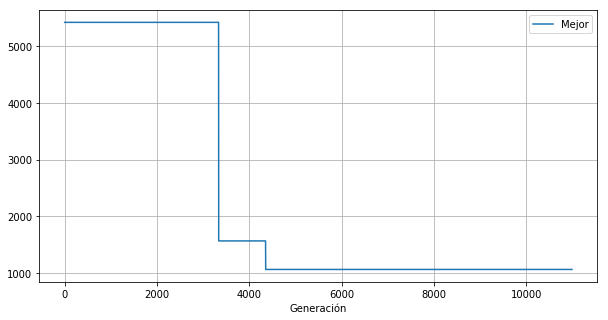

In [7]:
df2.plot(x='Generación', y=['Mejor'], figsize=(10,5), grid=True)

## Peor Ejecución

In [8]:
df_peor = df.loc[df["Mejor"] == df["Peor"].max()].head(1)
df_peor

,Mejor,Promedio,Mediana,Desviación Estándar,Peor
Número de Ejecución,,,,,
22,1000000000.00,1000000000.00,1000000000.00,0.00,1000000000.00


### Ejecución 22

In [9]:
peor_ejecucion = df_peor.index.values[0]
df3 = pd.read_csv('Ejecuciones/' + str(peor_ejecucion) + 'output.csv')

promedio = []
mejor = []
peor = []
desviacion = []
mediana = []
gen = []


for i in range(len(df3['generacion'].unique().tolist())):
    mejor.append(df3.loc[df3['generacion'] == i].min().values[1])
    promedio.append(df3.loc[df3['generacion'] == i].mean().values[1])
    desviacion.append(df3.loc[df3['generacion'] == i].std().values[1])
    mediana.append(df3.loc[df3['generacion'] == i].median().values[1])
    peor.append(df3.loc[df3['generacion'] == i].max().values[1])
    gen.append(i+1)

data = {'Generación': gen,\
    'Mejor':mejor, \
    'Promedio':promedio, \
    'Mediana':mediana, \
    'Desviación Estándar':desviacion, \
    'Peor':peor}
df3 = pd.DataFrame(data)
df3.head()

,Generación,Mejor,Promedio,Mediana,Desviación Estándar,Peor
0,1,nan,nan,nan,nan,nan
1,2,1000000000.00,1000000000.00,1000000000.00,0.00,1000000000.00
2,3,1000000000.00,1000000000.00,1000000000.00,0.00,1000000000.00
3,4,1000000000.00,1000000000.00,1000000000.00,0.00,1000000000.00
4,5,1000000000.00,1000000000.00,1000000000.00,0.00,1000000000.00


### Gráfica de Convergencia

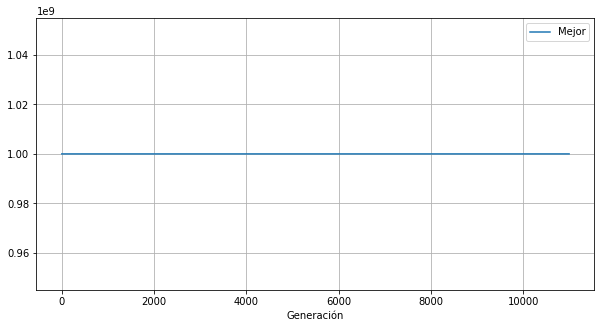

In [10]:
df3.plot(x='Generación', y=['Mejor'], figsize=(10,5), grid=True)

## Mediana Ejecución

In [11]:
df_mediana = df.loc[df["Mediana"] == df["Mediana"].median()].head(1)
df_mediana

,Mejor,Promedio,Mediana,Desviación Estándar,Peor
Número de Ejecución,,,,,
1,65469.30,895011812.72,1000000000.00,307288116.71,1000000000.00


### Ejecución 1

In [12]:
mediana_ejecucion = df_mediana.index.values[0]
df4 = pd.read_csv('Ejecuciones/' + str(mediana_ejecucion) + 'output.csv')

promedio = []
mejor = []
peor = []
desviacion = []
mediana = []
gen = []


for i in range(len(df4['generacion'].unique().tolist())):
    mejor.append(df4.loc[df4['generacion'] == i].min().values[1])
    promedio.append(df4.loc[df4['generacion'] == i].mean().values[1])
    desviacion.append(df4.loc[df4['generacion'] == i].std().values[1])
    mediana.append(df4.loc[df4['generacion'] == i].median().values[1])
    peor.append(df4.loc[df4['generacion'] == i].max().values[1])
    gen.append(i + 1)

data = {'Generación': gen,\
    'Mejor':mejor, \
    'Promedio':promedio, \
    'Mediana':mediana, \
    'Desviación Estándar':desviacion, \
    'Peor':peor}
df4 = pd.DataFrame(data)
df4.head()

,Generación,Mejor,Promedio,Mediana,Desviación Estándar,Peor
0,1,nan,nan,nan,nan,nan
1,2,287329.86,995001436.65,1000000000.00,70690360.83,1000000000.00
2,3,287329.86,995001436.65,1000000000.00,70690360.83,1000000000.00
3,4,287329.86,995001436.65,1000000000.00,70690360.83,1000000000.00
4,5,287329.86,995001436.65,1000000000.00,70690360.83,1000000000.00


### Gráfica de Convergencia

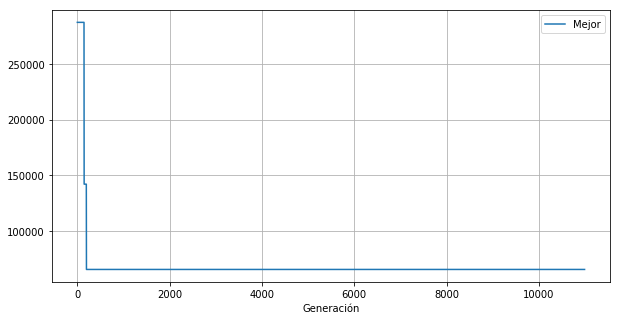

In [13]:
df4.plot(x='Generación', y=['Mejor'], figsize=(10,5), grid=True)

## Comparación Gráficas de Convergencia

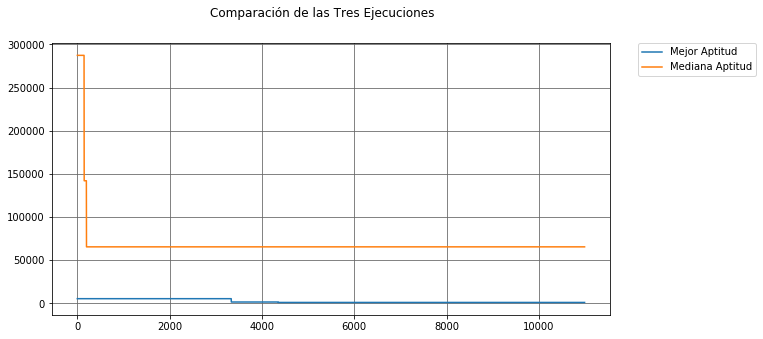

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 5))
fig.suptitle('Comparación de las Tres Ejecuciones')
ax.plot(df2['Generación'], df2['Mejor'], label="Mejor Aptitud")
ax.plot(df4['Generación'], df4['Mejor'], label="Mediana Aptitud")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()